# Importacion de librerias
se realizara el llamado de todas las librerias usadas en el proyecto, siendo pygame la mas importante para este apartado


In [2]:
import pygame
from pygame import mixer
import math
import numpy as np
import time
from matplotlib import pyplot as plt

pygame 2.1.2 (SDL 2.0.18, Python 3.10.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Definicion de las masas
### Masa 1
se define tanto la imagen, coordenadas y demas atributos relacionados a la masa 1 esta masa siempre contara con una velocidad de 0 y una masa de 1kg ademas de una posicion especifica en la pantalla

In [3]:
masa1Img = pygame.image.load('cuadrado.png')

masa1X = 370
masa1Y = 480

masa1= 1 #   float(input('Ingrese el valor de la masa 1: '))
velocidad_masa1 = 0
def masa1P(x, y):
    screen.blit(masa1Img, (x,y))

### Masa 2
al igual que la masa 1 se definen atributos esta vez son escogidos por el usuario, ademas se realizara la definicion de el coeficionete de restitucion elastica cuyo valor tiene que ser 1 para que la simulacion arroje el resultado de Pi
    

In [4]:
# Masa 2

masa2Img = pygame.image.load('cuadrado.png')
masa2X = 570
masa2Y = 480
masa2=  10000  #float(input('Ingrese el valor de la masa 2:  '))

velocidad_masa2 = 15#  float(input('Ingrese el valor de la velocidad de la masa 2:  '))
cte=math.sqrt(masa2)*velocidad_masa2
velocidad_masa2=velocidad_masa2*(-1)
e= 1 #float(input('Ingrese el valor del coeficionete de restitucion elastica objeto:  '))
ep= 1 #float(input('Ingrese el valor del coeficionete de restitucion elastica pared:  '))
def masa2P(x, y):
    screen.blit(masa2Img, (x, y))

## Inicializacion de la pantalla de Pygame 
se le dara un tamaño definido a pantalla de pygame a demas de iconos y un nombre personalizado 

In [5]:
# inicializa el pygame
pygame.init()
# create the screen                 x   y
screen = pygame.display.set_mode((1300, 600))
# Title and Icon
pygame.display.set_caption('Simulador de Impactos')
icon = pygame.image.load('impacto.png')
pygame.display.set_icon(icon)

## Se define la funcion para mostrar las colisiones en pantalla
se deseara mostar el numero de colisiones en pantalla en la parte superior izquierda para esto se define tanto sus coordenadas como su estilo de letra y tamaño en este apartado

In [6]:
# Texto de colisiones
font = pygame.font.Font('freesansbold.ttf', 32)
font2= pygame.font.Font('freesansbold.ttf', 16)
textX=10
textY=65

def mostrar_colisiones(x,y):
    colision=font.render('Colisiones: '+ str(numero_colisiones),True,(0,0,0))
    screen.blit(colision, (x,y))
    
    

 ## definicion de las funciones que mostran el valor de las masas
 
 se desea mostrar el valor de la masa del objeto ensima de este durante toda la simulacion, esto para comprender mejor las situacion que se desea simular

In [7]:
#Mostrar Masa sobre los bloques
def mostrar_masa1(x,y):
    peso1=font2.render(str(masa1)+' kg',True,(0,0,0))
    screen.blit(peso1, (x+10 , y-15))
    
def mostrar_eobjeto():
    coefi_eb=font.render('e bloque:'+str(e),True,(0,0,0))
    screen.blit(coefi_eb, (10 , 10))
def mostrar_epared():
    coefi_ep=font.render('e pared:  '+str(ep),True,(0,0,0))
    screen.blit(coefi_ep, (10 , 35))

    
def mostrar_masa2(x,y):
    peso2=font2.render(str(masa2)+' kg',True,(0,0,0))
    screen.blit(peso2, (x+10, y-15))
    
    

## Funciones que detectan colision entre bloques y final simulacion

* para la primera funcion se realizo un calculo de distancio, normalmente se utilizario el teorema de pitagoras para detectar esta distancia sin embargo como se esta trabajando solo en 1 dimension se puede obviar esta parte y nada mas predecir la distancia a la que se detecta el choque
* para la segunda se pregunta la velocidad y direccion de las velocidades si esta esta horientada a la derecha y la del bloque 1 menor a la del 2 se puede decir que nunca mas van a volver a chocar

In [8]:
#detecta colision entre la masa1 y masa 2
def isCollition(masa1X, masa2X):
    distance = masa2X -masa1X
    if distance <=64:
        return True
    else:
        return False
    
#detecta cuando la simulacion termine
def termina(velocidad_masa1,velocidad_masa2):
    if velocidad_masa1 >=0  and velocidad_masa2>0 and velocidad_masa1< velocidad_masa2:
        return True
    else:
        return False
    
vM1=[]
vM2=[]
tiempos=[]

# Ciclo infinito

parte del programa que se encargara de ejecutar todo el programa hasta que se detecto el final de la funcion
aqui se realizan calculos de velocidades, se evita que los bloques se trasnpasen, se dibuja fotograma a fotograma toda la susesion del programa

In [9]:
#intenta automatizar la velocidad de simulacion para que no sea cancerogeno
contador=int(math.log10(masa2)+1)
print('digitos: ', contador)
numero_colisiones = 0
frames=10
clock = pygame.time.Clock()
running = True
fram=0
while running:
    tiempos.append(fram)
    fram+=1
    
    #dibuja la pantalla y las lineas de la simulacion
    clock.tick(frames)
    screen.fill((240, 255, 240))
    pygame.draw.line(screen, (0,0,0), (40,544), (1300,544), 5)
    pygame.draw.line(screen, (0,0,0), (40,100), (40,544), 5)
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
            
    #detecta colision con la pared y calcula la velocidad en funcion de e
    if masa1X <= 40:
        sonido = mixer.Sound('clack.wav')
        sonido.play()
        velocidad_masa12=velocidad_masa1*(-ep)
        velocidad_masa1=velocidad_masa12
        
        numero_colisiones+=1         
       # print(numero_colisiones)
        
        
        
    collition=isCollition(masa1X, masa2X)#muestra las colisiones en pantalla  
    
 #calculo de conseracion del momento lineal en funcion de las masas y de e   
    if collition:
        sonido = mixer.Sound('clack.wav')
        sonido.play()
        velocidad_masa22 = (velocidad_masa1 * (1+e) + velocidad_masa2 * (masa2/masa1 -1)) /(e + masa2/masa1)
        velocidad_masa12 = (masa1*velocidad_masa1 + masa2*(velocidad_masa2-velocidad_masa22))/(masa1)
        
        velocidad_masa1 = velocidad_masa12
        velocidad_masa2 = velocidad_masa22
        
        numero_colisiones+=1         
       # print(numero_colisiones)
        
    mostrar_eobjeto()
    mostrar_epared()
    mostrar_colisiones(textX,textY)#muestra colisiones en pantalla   
    vM1.append(velocidad_masa1)
    vM2.append(velocidad_masa2)
    masa1X+=velocidad_masa1#*frames
    masa2X+=velocidad_masa2#*frames
    
    
#Evita que el bloque 1 traspase la pared y al bloque 2  
    
    if masa1X<40:
        frames=1000
        mostrar_masa1(40,masa1Y)
        masa1P(40,masa1Y)
        
    elif masa2X<40+64:
        frames=1000
        mostrar_masa1(40,masa1Y)
        masa1P(40,masa1Y)
        
    elif masa1X+64 > masa2X:
        frames=1000
        mostrar_masa1(masa2X-64,masa1Y)
        masa1P(masa2X-64,masa1Y)
        
    else:
        frames=10
        mostrar_masa1(masa1X,masa1Y)
        masa1P(masa1X,masa1Y)
    
#evita que el bloque 2 traspase el bloque 1    
    
    if masa2X<40+64:
        frames=1000
        mostrar_masa2(40+64,masa2Y)
        masa1P(40+64,masa1Y)
        
    else:
        frames=10
        mostrar_masa2(masa2X,masa2Y)
        masa2P(masa2X,masa2Y)
        
        
#determina cuando se acabe la simulacion    
    llave=termina(velocidad_masa1, velocidad_masa2)     
    
    if llave: 
        print('Ya es todo wey')
        mostrar_colisiones(textX,textY)
        running=False
    
    pygame.display.update()
time.sleep(2)

digitos:  5
Ya es todo wey


# graficacion

se graficara el momento lineal y la energia, esto no se realiza respecto al tiempo ya que nuestras variables correspoenden a las dos velocidades de los bloques.

* grafica de momento lineal funcionando correctamente
* grafica de energia con radio equivalente a la energia inicial del sistema

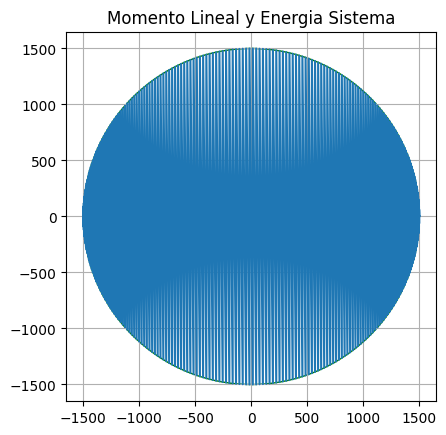

In [10]:
mV1=[]
for numero in vM1:
    mV1.append(np.sqrt(masa1)*numero)
mV2=[]
for numero in vM2:
    mV2.append(np.sqrt(masa2)*numero)
    
    
circle2 = plt.Circle((0, 0), cte, color='g', fill=False)
ax = plt.gca()
ax.add_artist(circle2)    
plt.plot(mV2,mV1)
plt.title('Momento Lineal y Energia Sistema')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

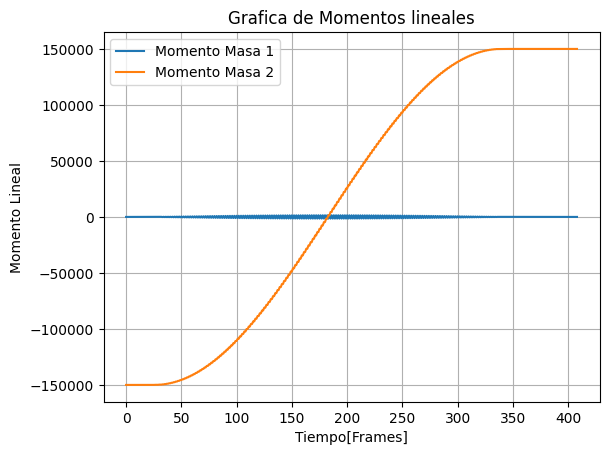

In [11]:


momento_m1=[]
for numero in vM1:
    momento_m1.append(masa1*numero)
momento_m2=[]
for numero in vM2:
    momento_m2.append(masa2*numero)
    
    
    
plt.plot(tiempos,momento_m1,label="Momento Masa 1")
plt.plot(tiempos,momento_m2,label="Momento Masa 2")
plt.xlabel('Tiempo[Frames]')
plt.ylabel('Momento Lineal')
plt.title('Grafica de Momentos lineales')
plt.legend()
plt.grid(True)
plt.show()

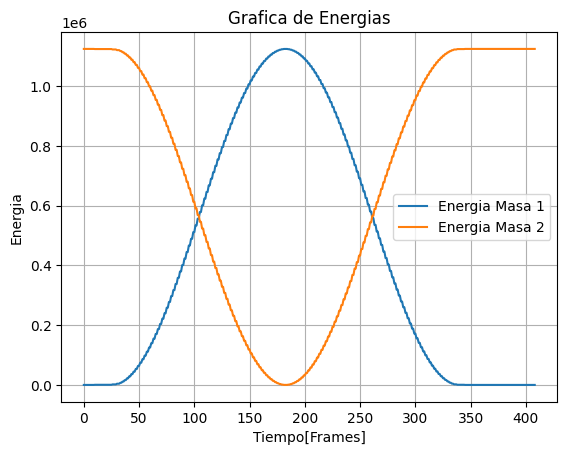

: 

In [12]:

energia_m1=[]
for numero in vM1:
    energia_m1.append((1/2)*masa1*numero**2)
energia_m2=[]
for numero in vM2:
    energia_m2.append((1/2)*masa2*numero**2)
    
    
    
plt.plot(tiempos,energia_m1,label="Energia Masa 1")
plt.plot(tiempos,energia_m2,label="Energia Masa 2")
plt.xlabel('Tiempo[Frames]')
plt.ylabel('Energia')
plt.title('Grafica de Energias')
plt.legend()
plt.grid(True)
plt.show()

pygame.quit()
exit()       
        

# 